In [2]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [11]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/own_data/train.csv')
df_perf_test, target = df.drop(['flag'],axis=1), df[['flag']]
df_perf_test.head()

,loannumber,historial,referido,age,parte_mes_pago,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,employment
0,12,0,1,50,1,1150,150.000000,0,1,0,2
1,7,1,1,37,1,1483,150.000000,0,1,0,2
2,3,0,1,44,2,766,100.000000,0,0,1,2
3,9,1,1,35,3,1466,133.333333,0,1,0,2
4,8,1,1,49,2,650,150.000000,0,0,1,2


In [12]:
df_perf_test.shape

(4359, 11)

ELBOW

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_perf_test)
    distortions.append(kmeanModel.inertia_)

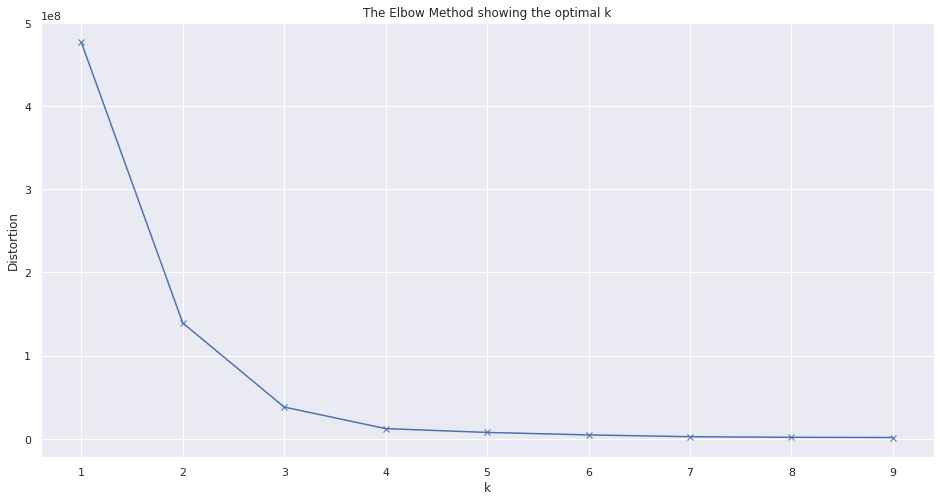

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

KMEANS

In [15]:
clustering =  KMeans(n_clusters = 3, max_iter = 300)#Crea el modelo
clustering.fit(df_perf_test)

KMeans(n_clusters=3)

CLASIFICACION EN EL ARCHIVO

In [16]:
df['Kmeans_Cluster']=clustering.labels_
df.head()

,loannumber,historial,referido,flag,age,parte_mes_pago,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,employment,Kmeans_Cluster
0,12,0,1,1,50,1,1150,150.000000,0,1,0,2,1
1,7,1,1,1,37,1,1483,150.000000,0,1,0,2,1
2,3,0,1,1,44,2,766,100.000000,0,0,1,2,2
3,9,1,1,1,35,3,1466,133.333333,0,1,0,2,1
4,8,1,1,1,49,2,650,150.000000,0,0,1,2,2


In [17]:
df.to_csv("cluster_train.csv",index=False)

VISUALIZACION

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_mt_cl = pca.fit_transform(df_perf_test)
pca_mt_cl_df = pd.DataFrame(data=pca_mt_cl, columns = ['Componente_1', 'Componente_2'])
pca_nombres_mt = pd.concat([pca_mt_cl_df, df[['Kmeans_Cluster']]], axis=1)

pca_nombres_mt

,Componente_1,Componente_2,Kmeans_Cluster
0,407.520111,-17.558533,1
1,740.183273,-3.348336,1
2,21.709768,16.455633,2
3,722.515757,12.648226,1
4,-92.059065,-38.435754,2
...,...,...,...
4354,-310.997947,2.565106,0
4355,-310.999374,2.833269,0
4356,21.708019,16.751396,2
4357,-310.999881,2.860982,0


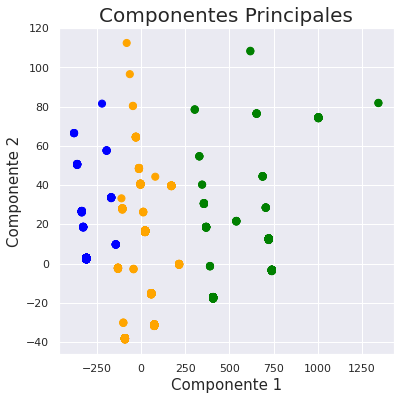

In [20]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_mt.Componente_1, y = pca_nombres_mt.Componente_2,
          c=color_theme[pca_nombres_mt.Kmeans_Cluster], s = 50)
plt.show()